In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import v3d

In [2]:
theory = 'mp2/6-31G*'

In [3]:
#optimized coordinates of the molecules
azi = """
0 1
    C           -1.372186183321    -2.010860020902    -0.886820192828
    C           -0.173158673000    -1.298344357907    -0.406115006426
    N            0.786309071860    -1.384810968974     0.420697487368
    C            0.662837700048    -0.111043752576    -0.491918176988
    H            1.422532833369    -0.002132476819    -1.261568419806
    C            0.271415655367     1.154529325936     0.168585840901
    O           -0.638034693748     0.950769479245     1.162558403008
    O            0.686902544636     2.258017066085    -0.144478115352
    H           -1.457401352716    -2.978238526949    -0.387585199421
    H           -1.313874303487    -2.157164437091    -1.968871402470
    H           -2.260422649854    -1.409349289546    -0.673788389312
    H           -0.815494634684     1.839688017493     1.533442847642
"""

#what coordinates are we optimizing
coords = [
    (2, 4),
    (4, 3),
    (6, 4)
]


In [4]:
#PES scans performed in Q-Chem

data = np.array([
    [
   [ 1.3000,      -359.5141310225 ],
   [ 1.3200,      -359.5197370890 ],
   [ 1.3400,      -359.5242908047 ],
   [ 1.3600,      -359.5278959819 ],
   [ 1.3800,      -359.5306467930 ],
   [ 1.4000,      -359.5326293427 ],
   [ 1.4200,      -359.5339220597 ],
   [ 1.4400,      -359.5345964360 ],
   [ 1.4600,      -359.5347176424 ],
   [ 1.4800,      -359.5343450820 ],
   [ 1.5000,      -359.5335328931 ],
   [ 1.5200,      -359.5323304063 ],
   [ 1.5400,      -359.5307825565 ],
   [ 1.5600,      -359.5289302612 ],
   [ 1.5800,      -359.5268107631 ],
   [ 1.6000,      -359.5244579430 ]
    ],
    [
   [ 1.4200,      -359.5261122424 ],
   [ 1.4400,      -359.5285133335 ],
   [ 1.4600,      -359.5304479638 ],
   [ 1.4800,      -359.5319654949 ],
   [ 1.5000,      -359.5331114583 ],
   [ 1.5200,      -359.5339250871 ],
   [ 1.5400,      -359.5344430786 ],
   [ 1.5600,      -359.5346982996 ],
   [ 1.5800,      -359.5347188254 ],
   [ 1.6000,      -359.5345310645 ],
   [ 1.6200,      -359.5341585102 ],
   [ 1.6400,      -359.5336210638 ],
   [ 1.6600,      -359.5329376835 ],
   [ 1.6800,      -359.5321241902 ],
   [ 1.7000,      -359.5311954957 ],
   [ 1.7200,      -359.5301641074 ]
    ],
    [
   [ 1.3300,      -359.5178406716 ],
   [ 1.3500,      -359.5225393475 ],
   [ 1.3700,      -359.5263377633 ],
   [ 1.3900,      -359.5293249890 ],
   [ 1.4100,      -359.5315827383 ],
   [ 1.4300,      -359.5331833736 ],
   [ 1.4500,      -359.5341944587 ],
   [ 1.4700,      -359.5346764905 ],
   [ 1.4900,      -359.5346862112 ],
   [ 1.5100,      -359.5342723671 ],
   [ 1.5300,      -359.5334817897 ],
   [ 1.5500,      -359.5323559124 ],
   [ 1.5700,      -359.5309324841 ],
   [ 1.5900,      -359.5292458306 ],
   [ 1.6100,      -359.5273271289 ],
   [ 1.6300,      -359.5252046838 ]
    ]
])

In [5]:
#the scans were all designed to get very close to the optimized structure
#so this is a good stand-in for the opt energy
opt_energy = np.mean(data[:, :, 1].min(axis=-1)) # Get the minimum energy from the previous three potential energy scans

In [6]:
energies_norm = (data[:, :, 1]-opt_energy)*627.503 # 1 Hartree = 627.503 kcal/mol ## Shift all the energy data upward with the minimum starting at 0
lengths = data[:, :, 0]

<>:8: SyntaxWarning: invalid escape sequence '\A'
<>:8: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_41530/992917697.py:8: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Bond Length, $\AA$')


Text(0, 0.5, 'Energy, kcal/mol')

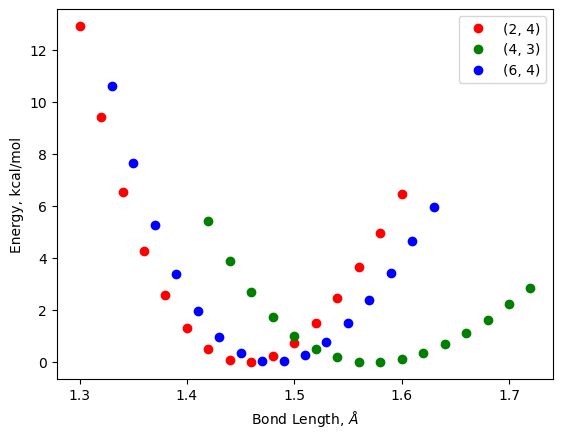

In [7]:
#collected data plots
colors = ['r', 'g', 'b']

for n, length in enumerate(lengths):
    plt.plot(length, energies_norm[n], 'o', color=colors[n], label=str(coords[n])) 

plt.legend()
plt.xlabel('Bond Length, $\AA$')
plt.ylabel('Energy, kcal/mol')

In [8]:
def vbond(r, k, r0):
    return k*(r-r0)**2

In [9]:
parms = []
                 
for i in range(len(coords)):
    parms.append(spo.curve_fit(vbond, 
                               lengths[i], 
                               energies_norm[i], 
                               p0=[300, 1.5]),                       
                )

<>:9: SyntaxWarning: invalid escape sequence '\A'
<>:9: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_41530/2364087929.py:9: SyntaxWarning: invalid escape sequence '\A'
  plt.xlabel('Bond Length, $\AA$')


Text(0, 0.5, 'Energy, kcal/mol')

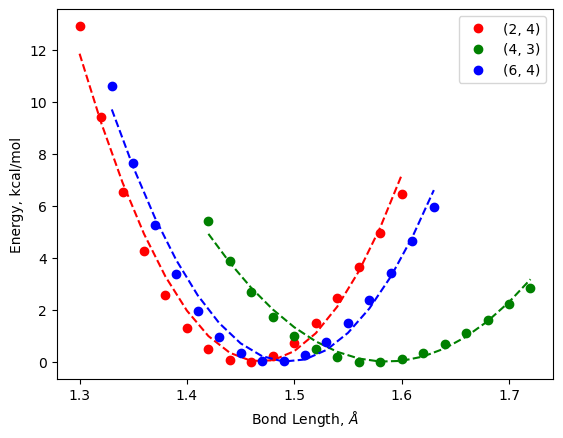

In [10]:
#fitted data plots
colors = ['r', 'g', 'b']

for n, length in enumerate(lengths):
    plt.plot(length, energies_norm[n], 'o', color=colors[n], label=str(coords[n])) 
    plt.plot(length, vbond(length, *parms[n][0]), '--', color=colors[n]) # plot the fitted functions for each dataset

plt.legend()
plt.xlabel('Bond Length, $\AA$')
plt.ylabel('Energy, kcal/mol')

In [11]:
for i in range(len(coords)):
    print('For the bond between atoms ', str(coords[i]))
    print('the force constant is ', str(parms[i][0][0]), '\u00B1', np.sqrt(np.diag(parms[i][1]))[0], 'kcal/mol/\u212B\u00b2')
    print('and the optimal bond length is ', str(parms[i][0][1]), '\u00B1', np.sqrt(np.diag(parms[i][1]))[1], '\u212B')


For the bond between atoms  (2, 4)
the force constant is  416.22855382931726 ± 12.203143995361643 kcal/mol/Å²
and the optimal bond length is  1.4686881211791918 ± 0.0018913122792350242 Å
For the bond between atoms  (4, 3)
the force constant is  177.59492805139917 ± 5.350876738149656 kcal/mol/Å²
and the optimal bond length is  1.5863842689340906 ± 0.001924740825367585 Å
For the bond between atoms  (6, 4)
the force constant is  358.9293086032471 ± 10.078685063013074 kcal/mol/Å²
and the optimal bond length is  1.4944016991741798 ± 0.0017802046729914033 Å
